## Creating Regions for Lat/Longs across 

In [2]:
import pandas as pd
import numpy as np
from geopy.distance import great_circle
import math
import seaborn as sns
from scipy import spatial
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import datetime

In [3]:
# Expanding number of columns:
pd.set_option('display.max_columns', 40)

In [4]:
Fire_Brightness_Model = pd.read_csv('/Users/AlfHaugen/Python/Wildfire_Data/FireExports/FireIntensity_Model_June4_Clean.csv')

In [5]:
print(Fire_Brightness_Model.shape)
Fire_Brightness_Model.head()

(1328922, 20)


,latitude,longitude,doy,month,year,cluster_reference,season,covertype,fuelcode,prefire_fuel,fuel_moisture_class,temperature,humidity,precip_intensity,visibility,wind_speed,wind_gust,brightness,bright_t31,frp
0,34.5954,-78.6218,1,1,2003,2003_4279,3,3,1600,6220.097576,3,64.14,0.88,0.011,9.022000,6.42,12.51,306.5,289.2,11.0
1,33.4182,-110.8618,1,1,2003,2003_1522,3,3,1220,4534.187262,2,32.17,0.37,0.000,9.216293,6.88,18.50,307.6,285.1,10.8
2,29.7120,-95.1284,1,1,2003,2003_919,3,1,1,277.412850,2,65.97,0.50,0.000,9.997000,10.98,16.90,307.2,294.1,5.6
3,28.9161,-98.6293,1,1,2003,2003_777,3,1,1,251.296812,2,72.89,0.51,0.000,9.997000,25.06,28.59,313.3,297.4,12.0
4,32.7772,-95.0444,1,1,2003,2003_3100,3,1,1,173.172870,2,58.39,0.30,0.000,9.216293,7.99,10.99,301.3,289.9,4.2


In [6]:
Fire_Brightness_Model['unique_id'] = Fire_Brightness_Model['cluster_reference'].astype(str) + "_" + Fire_Brightness_Model['latitude'].astype(str)


In [7]:
Fire_Brightness_Model.head()

,latitude,longitude,doy,month,year,cluster_reference,season,covertype,fuelcode,prefire_fuel,fuel_moisture_class,temperature,humidity,precip_intensity,visibility,wind_speed,wind_gust,brightness,bright_t31,frp,unique_id
0,34.5954,-78.6218,1,1,2003,2003_4279,3,3,1600,6220.097576,3,64.14,0.88,0.011,9.022000,6.42,12.51,306.5,289.2,11.0,2003_4279_34.5954
1,33.4182,-110.8618,1,1,2003,2003_1522,3,3,1220,4534.187262,2,32.17,0.37,0.000,9.216293,6.88,18.50,307.6,285.1,10.8,2003_1522_33.4182
2,29.7120,-95.1284,1,1,2003,2003_919,3,1,1,277.412850,2,65.97,0.50,0.000,9.997000,10.98,16.90,307.2,294.1,5.6,2003_919_29.712
3,28.9161,-98.6293,1,1,2003,2003_777,3,1,1,251.296812,2,72.89,0.51,0.000,9.997000,25.06,28.59,313.3,297.4,12.0,2003_777_28.9161
4,32.7772,-95.0444,1,1,2003,2003_3100,3,1,1,173.172870,2,58.39,0.30,0.000,9.216293,7.99,10.99,301.3,289.9,4.2,2003_3100_32.7772


In [5]:
#  To create Test DF for a smaller population - bypass to perform production. 
Fire_Brightness_Model_test = Fire_Brightness_Model[(Fire_Brightness_Model.year == 2004) & (Fire_Brightness_Model.month < 6)]

In [6]:
print(Fire_Brightness_Model_test.shape)
Fire_Brightness_Model_test.head()

(36336, 20)


,latitude,longitude,doy,month,year,cluster_reference,season,covertype,fuelcode,prefire_fuel,fuel_moisture_class,temperature,humidity,precip_intensity,visibility,wind_speed,wind_gust,brightness,bright_t31,frp
96199,31.2482,-85.7553,1,1,2004,2004_3025,3,3,1160,7020.760516,4,66.43,0.32,0.0,9.997000,5.74,11.681998,309.0,274.9,13.9
96200,35.4981,-78.1687,1,1,2004,2004_5314,3,3,1160,7020.760516,4,62.12,0.22,0.0,9.997000,4.93,5.060000,302.6,282.3,8.6
96201,35.4299,-77.3891,1,1,2004,2004_5256,3,3,1160,7020.760516,4,58.40,0.25,0.0,9.673000,5.17,10.010000,316.1,285.5,18.2
96202,31.7169,-81.8174,1,1,2004,2004_1108,3,3,1140,7333.856370,4,61.25,0.31,0.0,9.997000,0.51,11.681998,302.9,284.0,15.2
96203,32.1135,-83.5330,1,1,2004,2004_3253,3,3,1140,7646.952224,3,59.04,0.39,0.0,9.216293,2.01,4.000000,304.6,287.6,20.8


In [8]:
Fire_Brightness_Model_test.head()

,latitude,longitude,doy,month,year,cluster_reference,season,covertype,fuelcode,prefire_fuel,fuel_moisture_class,temperature,humidity,precip_intensity,visibility,wind_speed,wind_gust,brightness,bright_t31,frp,unique_id
96199,31.2482,-85.7553,1,1,2004,2004_3025,3,3,1160,7020.760516,4,66.43,0.32,0.0,9.997000,5.74,11.681998,309.0,274.9,13.9,2004_3025_31.2482
96200,35.4981,-78.1687,1,1,2004,2004_5314,3,3,1160,7020.760516,4,62.12,0.22,0.0,9.997000,4.93,5.060000,302.6,282.3,8.6,2004_5314_35.4981
96201,35.4299,-77.3891,1,1,2004,2004_5256,3,3,1160,7020.760516,4,58.40,0.25,0.0,9.673000,5.17,10.010000,316.1,285.5,18.2,2004_5256_35.4299
96202,31.7169,-81.8174,1,1,2004,2004_1108,3,3,1140,7333.856370,4,61.25,0.31,0.0,9.997000,0.51,11.681998,302.9,284.0,15.2,2004_1108_31.7169
96203,32.1135,-83.5330,1,1,2004,2004_3253,3,3,1140,7646.952224,3,59.04,0.39,0.0,9.216293,2.01,4.000000,304.6,287.6,20.8,2004_3253_32.1135


In [8]:
Fire_Brightness_Model_TestInput=Fire_Brightness_Model.loc[:,['unique_id','latitude','longitude']]

In [9]:
print(Fire_Brightness_Model_TestInput.shape)
Fire_Brightness_Model_TestInput.head()

(1328922, 3)


,unique_id,latitude,longitude
0,2003_4279_34.5954,34.5954,-78.6218
1,2003_1522_33.4182,33.4182,-110.8618
2,2003_919_29.712,29.7120,-95.1284
3,2003_777_28.9161,28.9161,-98.6293
4,2003_3100_32.7772,32.7772,-95.0444


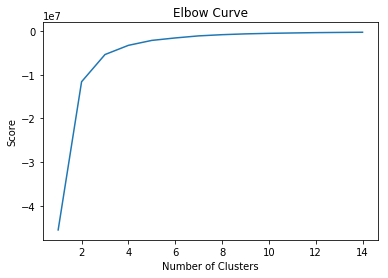

In [36]:
K_clusters = range(1,15)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]  

Y_axis = Fire_Brightness_Model_TestInput[['latitude']]
X_axis = Fire_Brightness_Model_TestInput[['longitude']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 8, init ='k-means++')
kmeans.fit(Fire_Brightness_Model_TestInput[Fire_Brightness_Model_TestInput.columns[1:3]]) # Compute k-means clustering.

Fire_Brightness_Model_TestInput['cluster_label'] = kmeans.fit_predict(Fire_Brightness_Model_TestInput[Fire_Brightness_Model_TestInput.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(Fire_Brightness_Model_TestInput[Fire_Brightness_Model_TestInput.columns[1:3]]) # Labels of each point
Fire_Brightness_Model_TestInput.head(10)

,unique_id,latitude,longitude,cluster_label
0,2003_4279_34.5954,34.5954,-78.6218,6
1,2003_1522_33.4182,33.4182,-110.8618,4
2,2003_919_29.712,29.7120,-95.1284,3
3,2003_777_28.9161,28.9161,-98.6293,3
4,2003_3100_32.7772,32.7772,-95.0444,3
5,2003_3015_32.2024,32.2024,-94.6048,3
6,2003_1290_33.3287,33.3287,-95.5265,3
7,2003_1290_33.3272,33.3272,-95.5372,3
8,2003_2471_30.7567,30.7567,-96.6769,3
9,2003_1445_34.7806,34.7806,-95.2530,3


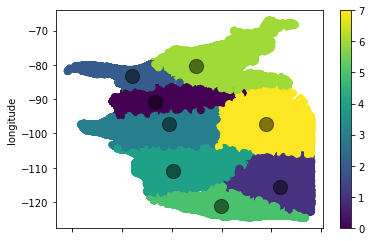

In [11]:
Fire_Brightness_Model_TestInput.plot.scatter(x = 'latitude', y='longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [22]:
fire_regionsdf = Fire_Brightness_Model_TestInput.groupby('cluster_label').size().to_frame(name = 'count').reset_index()
#fuelcodedf = emdata.groupby('cluster_reference')['fuelcode'].agg(pd.Series.mode).to_frame(name = 'fuelcode').reset_index()  # Determine the most frequent fuel code across cluster. 
fire_regionsdf.head(20)

,cluster_label,count
0,0,234637
1,1,211112
2,2,229633
3,3,224814
4,4,100534
5,5,157785
6,6,83546
7,7,86861


In [25]:
Fire_Brightness_Model_TestInput['cluster_label'].isnull().count()

1328922

In [26]:
Fire_Brightness_Model_TestInput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328922 entries, 0 to 1328921
Data columns (total 4 columns):
unique_id        1328922 non-null object
latitude         1328922 non-null float64
longitude        1328922 non-null float64
cluster_label    1328922 non-null int32
dtypes: float64(2), int32(1), object(1)
memory usage: 35.5+ MB


In [15]:
Fire_Brightness_Model_TestInput.to_csv('/Users/AlfHaugen/Python/Wildfire_Data/FireExports/Fire_Brightness_Regions_June7.csv',index=False)